# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

## Занятие №0. Core libraries. Разминка.

In [84]:
import sys

**Как получить путь к интерпретатору?**

In [2]:
sys.executable;

**Как узнать, где ищутся модули для импорта?**

In [3]:
sys.path;

**Что может помочь написать кросс-платформенный код?**

In [4]:
sys.platform

'win32'

**Как перенаправить поток вывода?**

In [7]:
with open('log.txt', 'w') as f:
    print(2, file=f)

### Задача №0

Вывести распределение слов в Zen of Python.

In [9]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [10]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [11]:
import this

In [12]:
sys.stdout = stdout 

In [15]:
import re
from collections import Counter, OrderedDict

In [16]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [23]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [28]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [62]:
from functools import partial

def remove_elements_from_array(array, element):
    index = None
    elements_to_delete_number = 0

    for i in range(len(array)):
        if array[i] == element:
            index = i
            break  
  
    if index is None:
        return array
    
    
    for j in range(index + 1, len(array)):
        if array[j] != element:
            array[index], array[j] = array[j], element
            if elements_to_delete_number != 0:  
                index = j - elements_to_delete_number
            else:
                index = j

        elif array[j] == element:        
            elements_to_delete_number += 1
    
    for j in range(elements_to_delete_number + 1):
        array.pop()

    return array


delete_zeros_from_array = partial(remove_elements_from_array, element=0)
delete_ones_from_array = partial(remove_elements_from_array, element=1)

In [54]:
a = [0, 0, 0, 0, 1, 5, 0, 7, 0, 2, 3, 0, 0, 20, 11, 0, 0]
b = [1, 2, 3, 4, 5, 6, 7]

In [55]:
delete_zeros_from_array(a)

[1, 5, 7, 2, 3, 20, 11]

In [56]:
delete_zeros_from_array(b)

[1, 2, 3, 4, 5, 6, 7]

Проверка, что при удалении единичек из массива, состоящего из нулей и единиц, остаются только нули.

In [69]:
sums_array = []
for i in range(1, 1000):
    array = list(np.random.randint(0, 2, size = i))
    sums_array.append(np.sum(delete_ones_from_array(array)))

sum(sums_array)

0.0

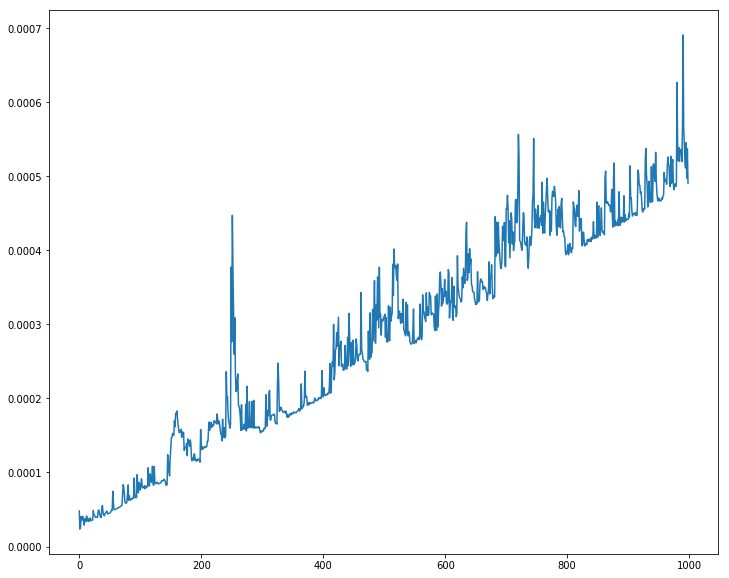

In [77]:
import time
from matplotlib import pyplot as plt
import numpy as np

times_array = []
for i in range(1, 1000):
    time_of_work = []
    for j in range(100):
        t_start = time.time()
        array = list(np.random.randint(0, 2, size = i))
        delete_zeros_from_array(array)
        time_of_work.append(time.time() - t_start)
    times_array.append(np.mean(time_of_work))

plt.figure(figsize=(12, 10))
plt.plot(times_array)
plt.show()

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [1]:
a = complex(1, 2)
b = complex(3, 4)
c = complex(10, 12)
d = complex(-2, 4)

In [4]:
def sorting(array):
    if len(array) <= 1:
        return array
    else:
        pivot = array[len(array) // 2]
        left_array = []
        right_array = []
        middle_array = []
        for number in array:
            if number < pivot:
                left_array.append(number)
            elif number > pivot:
                right_array.append(number)
            else:
                middle_array.append(number)
        return sorting(left_array) + middle_array + sorting(right_array)


def complex_min(complex_array):
    length_list = []
    for number in complex_array:
        length_list.append(pow(number.imag**2 + number.real**2, 0.5))
    
    numbers_dic = dict(zip(length_list, complex_array))
    result = numbers_dic[sorting(length_list)[0]]
  
    return result

In [5]:
complex_min([a, b, c, d])

(1+2j)

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [1]:
import numpy as np
from math import gcd
from functools import lru_cache, reduce
from itertools import permutations
import sys
sys.setrecursionlimit(40000)

@lru_cache(maxsize=None)
def F(n):
    if n < 2:
        return n
    return F(n-1) + F(n-2)

def casher(card_number, card_password):
    card_split = []
    for i in [0, 4, 8, 12]:
        card_split.append(int(card_number[i:i+4]))
    
    fib_numbers = [F(num) for num in card_split]
    
    gcd_list = []
    for permutation in permutations(fib_numbers):
        concat_of_numbers = int(reduce(lambda x, y: str(x) + str(y), permutation))
        gcd_list.append(gcd(concat_of_numbers, card_password))
    
    return np.median(gcd_list)

In [2]:
casher('1000000110000001', 25)

13.0

In [3]:
casher('1000100010000001', 25)

25.0

In [4]:
casher('1000999910009999', 25)

13.0

In [5]:
casher('2418380017189999', 25)

1.0

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

Идея такая. Сравним скорость добавления новых элементов к list и deque, а также объем памяти. Параметр step показывает, на сколько увеличивается количество прибавляемых элементов к массиву при каждом новом эксперименте.

In [ ]:
import time
from matplotlib import pyplot as plt
from collections import deque
import numpy as np
import sys

def list_deque_compare(array_max_size, step):
    # в эти массивы будем записывать результаты экспериментов
    times_array_list = []
    times_array_deque = []
    size_array_list = []
    size_array_deque = []
    
    # цикл по экспериментам
    for i in range(0, array_max_size, step):
        time_of_work_list = []
        time_of_work_deque = []
        size_list = []
        size_deque = []
        
        # в каждом эксперименте делаем усреднение по 10 итерациям
        for j in range(10):
            list_array = []
            deque_array = deque([])

            t_start_list = time.time()
            list_array.extend([1] * i)       
            time_of_work_list.append(time.time() - t_start_list)
            size_list.append(sys.getsizeof(list_array))

            t_start_deque = time.time()
            deque_array.extend([1] * i)       
            time_of_work_deque.append(time.time() - t_start_deque)
            size_deque.append(sys.getsizeof(deque_array))

        times_array_list.append(np.mean(time_of_work_list))
        times_array_deque.append(np.mean(time_of_work_deque))
        size_array_list.append(np.mean(size_list))
        size_array_deque.append(np.mean(size_deque))
    
    # посмотрим сколько раз deque был быстрее list, сколько раз медленне и 
    # насколько в среднем он был быстрее/медленне
    compare_time = np.array(times_array_deque) - np.array(times_array_list)
    mean_difference_time = np.mean(compare_time)
    deque_faster = np.sum(compare_time > 0)
    deque_slower = np.sum(compare_time < 0)
    
    # сравним память
    compare_memory = np.array(size_array_deque) - np.array(size_array_list)
    mean_difference_size = np.mean(compare_memory)
    deque_more_memory = np.sum(compare_memory > 0)
    deque_less_memory = np.sum(compare_memory < 0)
    
    return deque_faster, deque_slower, np.round(mean_difference_time, 7), \
                deque_more_memory, deque_less_memory, np.round(mean_difference_size, 7), \
                compare_time, compare_memory



Посмотрим на результаты эксперимента. Мы прибавляли от нуля до одного миллиона элементов с шагом в 1000 элементов. В 734 случаях deque отработал быстрее (в среднем на 0.00024). В 999 случаях ему потребовалось меньше памяти, чем list (в среднем на ~0.3 мб).

In [4]:
comparison_1 = list_deque_compare(10**6, 1000)

In [7]:
comparison_1[:6]

(734, 257, 0.0002361, 1, 999, -374335.952)

Проведем еще одно испытание в котором будет меньше экспериментов, но будут прибавлятся массивы большего размера. Тут во всех случаях deque оказался быстрее и в 9 случаях из 10 потребовал меньше памяти.

In [12]:
comparison_2 = list_deque_compare(10**8, 10**7)

In [13]:
comparison_2[:6]

(9, 0, 0.0943403, 1, 9, -33749475.2)

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.